In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

In [2]:
dataset_loc = "dair-ai/emotion"
dataset_cache_dir = "../data/raw"

In [3]:
dataset = load_dataset(dataset_loc, cache_dir = dataset_cache_dir)

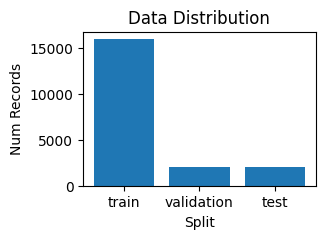

In [4]:
values = []

for split in dataset.keys():
    values.append(len(dataset[split]))

plt.figure(figsize=(3, 2))
plt.bar(dataset.keys(), values)
plt.title("Data Distribution")
plt.xlabel("Split")
plt.ylabel("Num Records")
plt.show()

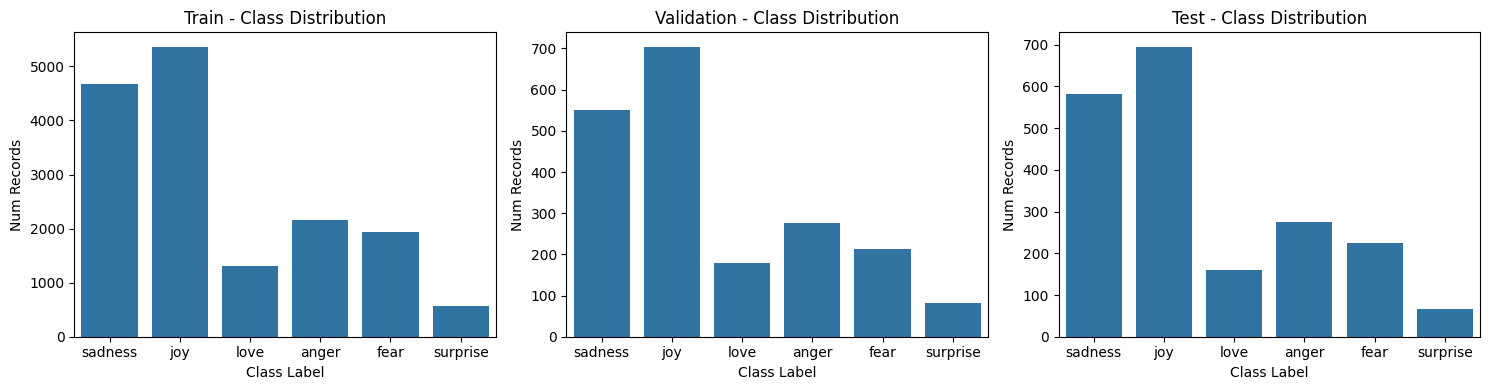

In [5]:
splits = list(dataset.keys())
num_splits = len(splits)

fig, axes = plt.subplots(1, num_splits, figsize=(5 * num_splits, 4))

for idx, split in enumerate(splits):
    label_counts = dataset[split].features['label'].names
    label_ids = [example['label'] for example in dataset[split]]
    label_series = pd.Series(label_ids)

    sns.countplot(x=label_series, ax=axes[idx])
    axes[idx].set_title(f"{split.capitalize()} - Class Distribution")
    axes[idx].set_xlabel("Class Label")
    axes[idx].set_ylabel("Num Records")
    axes[idx].set_xticks(range(len(label_counts)))
    axes[idx].set_xticklabels(label_counts)

plt.tight_layout()
plt.show()

In [19]:
train_char_len = []
test_char_len = []
valid_char_len = []

train_char_len = list(map(len, dataset['train']['text']))
test_char_len = list(map(len, dataset['test']['text']))
valid_char_len = list(map(len, dataset['validation']['text']))

char_lens = [train_char_len, valid_char_len, test_char_len]

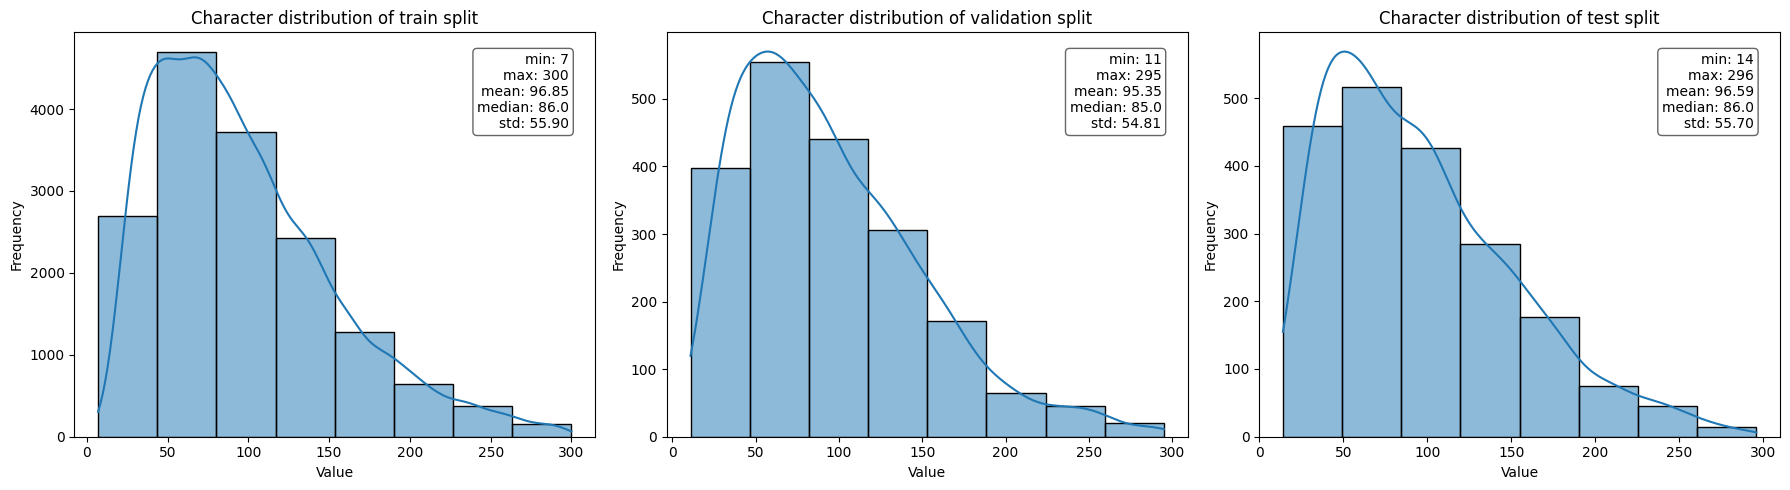

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, ax in enumerate(axes):
    data = np.array(char_lens[i])
    sns.histplot(data, bins=8, kde=True, ax=ax)

    stats_text = (
            f"min: {np.min(data)}\n"
            f"max: {np.max(data)}\n"
            f"mean: {np.mean(data):.2f}\n"
            f"median: {np.median(data)}\n"
            f"std: {np.std(data):.2f}"
        )
        
    ax.text(
        0.95, 0.95,
        stats_text,
        transform=ax.transAxes,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.6),
        fontsize=10
    )
    
    ax.set_title(f"Character distribution of {list(dataset.keys())[i]} split")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()
